# **Imports**

In [514]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# **Loding data**

In [515]:
#Load datasets
order_products = pd.read_csv('C:/Users/leona/OneDrive/Documents/DS Project - Corner/datascience-test-master-2/data/order_products.csv', sep=',') #, encoding='latin-1')
orders = pd.read_csv('C:/Users/leona/OneDrive/Documents/DS Project - Corner/datascience-test-master-2/data/orders.csv', sep=',')
shoppers = pd.read_csv('C:/Users/leona/OneDrive/Documents/DS Project - Corner/datascience-test-master-2/data/shoppers.csv', sep=',')
storebranch = pd.read_csv('C:/Users/leona/OneDrive/Documents/DS Project - Corner/datascience-test-master-2/data/storebranch.csv', sep=',')

# **Data Preparation**

In [516]:
#Analysing some metrics thru descriptive statistics
shoppers.describe()
orders.describe()

,lat,lng,total_minutes
count,10000.000000,10000.000000,8000.000000
mean,-33.427090,-70.668017,81.106130
std,0.558675,0.400249,34.720837
min,-36.942135,-73.144281,11.969489
25%,-33.426861,-70.605795,55.225480
50%,-33.398110,-70.574591,74.731672
75%,-33.353783,-70.540307,100.273498
max,-29.833517,-70.453728,304.190303


In [517]:
#Checking null values
order_products.isnull().sum()
orders.isnull().sum()
storebranch.isnull().sum()

#Null values found on the follow columns: found_rate, accepted_rate, rating
shoppers.isnull().sum()

#Identifying how these amounts represent relatively according to the whole dataset (percentual)
shoppers.isnull().sum() / shoppers["shopper_id"].count() * 100

#Checking some descriptive statistics to find an interesting way to replace the missing values
shoppers["found_rate"].describe()
shoppers["accepted_rate"].describe()
shoppers["rating"].describe()

#Checking mean and median groupped by Seniority to see if there any relation between, but discovered that it's not relevant
#Median was used to discart outliers if exist
shoppers.groupby("seniority").agg({'found_rate': ['mean','median'], 
                                   'accepted_rate': ['mean','median'], 
                                   'rating': ['mean','median']}).sort_values('seniority', ascending=True)

shoppers.agg({'found_rate': ['mean','median'], 
                                   'accepted_rate': ['mean','median'], 
                                   'rating': ['mean','median']})
#shoppers.describe()

,found_rate,accepted_rate,rating
mean,0.861082,0.908276,4.848428
median,0.863900,0.944444,4.880000


In [518]:
#I've decided to impute the median of each metric instead of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(shoppers[['found_rate', 'accepted_rate', 'rating']])
shoppers[['found_rate', 'accepted_rate', 'rating']] = imputer.transform(
    shoppers[['found_rate', 'accepted_rate', 'rating']].values)

In [519]:
#Testing a previous null case and checking that now it is input as the median values
shoppers[shoppers["shopper_id"] == "db39866e62b95bb04ebb1e470f2d1347"]

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,0.8639,2.41,0.944444,4.88


In [520]:
orders["on_demand"].value_counts()
orders.count()
order_products.count()

order_id      198500
product_id    198500
quantity      198500
buy_unit      198500
dtype: int64

In [521]:
#Creating a procedure for splitting the "buy_unit" field into the two new fields: "quantity_UN" and "quantity_KG"
order_products.loc[order_products['buy_unit']=="UN", 'quantity_UN'] = order_products['quantity']
order_products.loc[order_products['buy_unit']!="UN", 'quantity_UN'] = 0
order_products.loc[order_products['buy_unit']=="KG", 'quantity_KG'] = order_products['quantity']
order_products.loc[order_products['buy_unit']!="KG", 'quantity_KG'] = 0
order_products

,order_id,product_id,quantity,buy_unit,quantity_UN,quantity_KG
0,47099653730fb1b76537fc10ad876255,c1244453d731c77416cb4766e3bd76cb,1.0,UN,1.0,0.0
1,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,KG,0.0,1.0
2,f26d16bf6f38c9e31d0be877f4013a9e,b8f880759d014134e272d881d49989a2,1.0,UN,1.0,0.0
3,161ccc896835ab41761b0e726becb6b1,dbc062b9bef805d27a6f4bea7edfe1f1,1.0,UN,1.0,0.0
4,4713deca10bb5db98fae150b52d61fc0,93a060f269bb569398921100f84c519a,2.0,UN,2.0,0.0
...,...,...,...,...,...,...
198495,edd8fe4fd7d75de060cae811756603b0,e7f4a5ea6d480b7a1a7076fad543875e,3.0,UN,3.0,0.0
198496,70c0ff9c8533539b1c04e96398fef697,f506d0401b99c6c00d8792d38ce93aa1,6.0,UN,6.0,0.0
198497,dcf086aadb08ef7e695fadd723d881a7,c9970c5966ad6399d1c52aef34268699,1.0,UN,1.0,0.0
198498,f5f76f8fb58cdafe94b41fd836dfcec7,2cdd75fa252b3918918c662922b11b6e,3.0,UN,3.0,0.0


In [522]:
#It's necessary to aggregate the 'order_products' dataset by 'order_id'
order_products_agg = order_products.groupby('order_id').sum()[['quantity_UN', 'quantity_KG']]
order_products_agg = order_products_agg.reset_index(level=0)
order_products_agg

,order_id,quantity_UN,quantity_KG
0,0004a3841c1eeb6c6e77585a941c21e0,8.0,0.000
1,0005a6ecbbde1e8d273f5577bcff2c9c,2.0,0.000
2,0007baeb6700fc203be2d1f1e11222d7,39.0,0.000
3,0012195a6a8ca9ec308a3010eeea8ebc,13.0,0.000
4,0013011fa72b498b9feb84f4e7104980,63.0,1.636
...,...,...,...
9973,ffc3234b2e009e5422a4b5e24961c038,13.0,5.100
9974,ffcc66cd4d1056b67523a39ff07d7700,68.0,4.015
9975,ffcf270be4bba33349ce827c70fe9439,52.0,0.332
9976,ffdbc12cfcf7101a517a7eb7e1776c43,36.0,3.602


In [523]:
#Merging the datasets together, applying inner (using the 'order_products_agg' dataset)
corner = pd.merge(orders, order_products_agg, how="inner", on=["order_id", "order_id"])
corner = pd.merge(corner, shoppers, how="inner", on=["shopper_id", "shopper_id"])
corner = pd.merge(corner, storebranch, how="inner", on=["store_branch_id", "store_branch_id"])

In [524]:
#Analysing the merge results
print(orders.shape)
print(order_products.shape)
print(shoppers.shape)
print(storebranch.shape)
print(corner.shape)
#print(corner.isnull().sum())
#print(corner.count())

(10000, 8)
(198500, 6)
(2864, 6)
(476, 4)
(9978, 18)


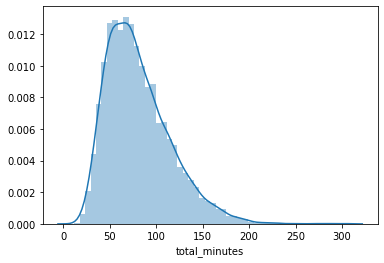

In [525]:
#Distribution curve across our label
sns.distplot(corner['total_minutes'])

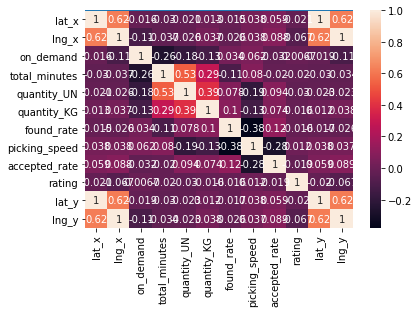

In [526]:
#Analysing the distribution of the label field
sns.distplot(corner['total_minutes'])

#Analysing the correlation among total_minutes and the other metrics available
corner.corr()
sns.heatmap(corner.corr(), annot=True)

In [527]:
#Renaming the columns name
corner = corner.rename(columns={'lat_x': 'lat_order', 'lng_x': 'lng_order'})
corner = corner.rename(columns={'lat_y': 'lat_store', 'lng_y': 'lng_store'})

In [528]:
#Converting to integer values: "True" to 1 / "False" to 0
corner['on_demand'] = corner["on_demand"].apply(lambda x : 1 if (x==True) else 0)

In [582]:
#Converting categorical field to numeric by LabelEncoder library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
corner['seniority'] = le.fit_transform(corner['seniority'])
#corner['promised_time_'] = le.fit_transform(corner['promised_time'])

In [587]:
#Converting datetime object field to integer
corner['promised_time'] = pd.to_datetime(corner['promised_time'])
corner['promised_time'] = pd.to_datetime(corner['promised_time']).astype(np.int64)
corner.info() #OK

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 9977
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         9978 non-null   object 
 1   lat_order        9978 non-null   float64
 2   lng_order        9978 non-null   float64
 3   promised_time    9978 non-null   int64  
 4   on_demand        9978 non-null   int64  
 5   shopper_id       9978 non-null   object 
 6   store_branch_id  9978 non-null   object 
 7   total_minutes    7983 non-null   float64
 8   quantity_UN      9978 non-null   float64
 9   quantity_KG      9978 non-null   float64
 10  seniority        9978 non-null   int32  
 11  found_rate       9978 non-null   float64
 12  picking_speed    9978 non-null   float64
 13  accepted_rate    9978 non-null   float64
 14  rating           9978 non-null   float64
 15  store_id         9978 non-null   object 
 16  lat_store        9978 non-null   float64
 17  lng_store     

In [588]:
#Moving the rows that we want to predict (the goal of this activity) to a new dataset
predict = corner[corner['total_minutes'].isnull()]
predict = predict[['order_id','lat_order','lng_order','on_demand','quantity_UN','quantity_KG','seniority','found_rate',
      'picking_speed','accepted_rate','rating','lat_store','lng_store','promised_time']]

In [589]:
#Removing predict dataset
X = corner.dropna(subset=['total_minutes'], inplace=True)
Y = corner.dropna(subset=['total_minutes'], inplace=True)

#Picking up the useful fields for the feature dataset
X = corner[['lat_order','lng_order','on_demand','quantity_UN','quantity_KG','seniority','found_rate',
      'picking_speed','accepted_rate','rating','lat_store','lng_store','promised_time']]

#Label dataset
Y = corner[['total_minutes']]

In [614]:
print(X.shape)
print(Y.shape)
print(predict.shape)
#print(corner.shape)

(7983, 13)
(7983, 1)
(1995, 13)


# **Feature Scalling**

In [ ]:
#Transforming the features to a Standard scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
predict = scaler.fit_transform(predict[['lat_order','lng_order','on_demand','quantity_UN','quantity_KG','seniority','found_rate',
      'picking_speed','accepted_rate','rating','lat_store','lng_store','promised_time']])

# **Dataset Split**

In [615]:
#Splitting my dataset into train/test dataset
#Training dataset: 70%
#Testing dataset: 30%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **Model Training**

In [616]:
#Creating the LinearRegression model for the training dataset
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

# **Evaluate the Model**

In [617]:
#Appling the testing dataset to be predicted
predictions = lm.predict(X_test)

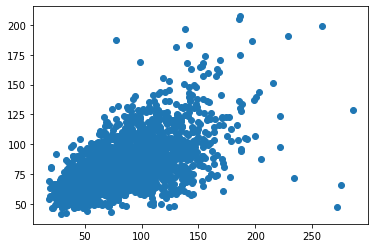

In [618]:
#Comparing the results predicted with the correct label
plt.scatter(Y_test, predictions)

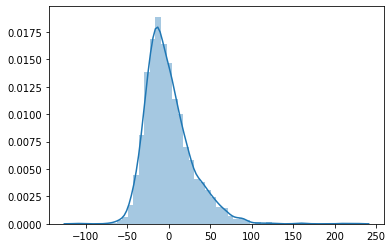

In [619]:
#Analysing the residuals in a graphically way
sns.distplot((Y_test-predictions))

# **Performance Metrics**

In [620]:
#Analysing the Regression Evaluation Metrics - Model Accuracy
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(Y_test, predictions)) #Mean Absolute Error (MAE)
print("MSE:",metrics.mean_squared_error(Y_test, predictions)) #Mean Squared Error (MSE)
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test, predictions))) #Root Mean Squared Error (RMSE)

MAE: 21.259475873108272
MSE: 783.6399781299232
RMSE 27.9935702998014


# **Applying the predictions dataset**

In [623]:
#Applying the predictions dataset (purpose of this activity)
activity_predictions = lm.predict(predict)